## <center>The Sparks Foundation</center>
## <center><b>TASK - 1</b></center>
## <center><b>Prediction using Supervised Machine Learning</b></center>
### <center><b>Author: Utkarsh Yeole (Data Science and Business Analysis Intern)</b></center>


 In this task, we have to predict the percentatge of an student based on the no. of study  hours. This is a simple linear regression task.
What will be predicted score if a student studies for 9.25 hrs/ day?

### Importing the Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Loading the Dataset

In [2]:
fileurl =  "https://raw.githubusercontent.com/utkarshyeole/The-Sparks-Foundatin/main/Task1%20Dataset.csv"
data =  pd.read_csv(fileurl)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Finding the size of the data
In this section we use "shape" attribute of Dataframe which returns a tuple in which first element represent number of rows and second one represent the number of columns.

In [3]:
data.shape

(25, 2)

### Looking for Null Values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


As we can see above that, there are no null values in the dataset. So no requriement of dealing with missing values. 

### Summary Statistics


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


#### Obeservations:
<ul>
    <li> The Mean value is greater than the median value (50% percentile).
     <li> The difference between max value and value at 75% percentile (Third Quartile) is very small.  
         <li> From above obeservations, we can draw the inference that there are no outliers present  in the data.

</ul>

 ### Checking for Outliers in the data using Boxplot 

<ipython-input-6-68fbdfbcefca>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows+1,number_of_columns,i+1)
C:\Users\mayur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-6-68fbdfbcefca>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(number_of_rows+1,number_of_columns,i+1)
C:\Users\mayur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional 

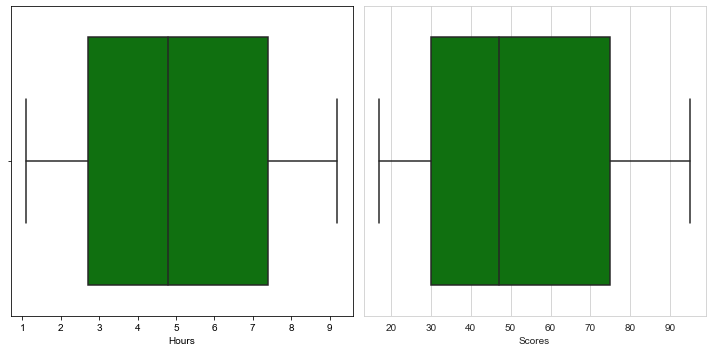

In [6]:
l = data.columns.values
number_of_columns= 2
number_of_rows = (len(l)-1)/number_of_columns
plt.figure(figsize =  (10,5))
for i in range(0, len(l)):
    plt.subplot(number_of_rows+1,number_of_columns,i+1)
    sns.set_style('whitegrid')
    sns.boxplot(data[l[i]] , color='green')
    plt.tight_layout()

This boxplot verifies that there are no outliers present in data.

### Finding Correlation between the Variables


<AxesSubplot:>

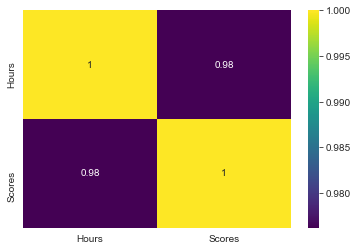

In [7]:
correlation = data.corr()
sns.heatmap(correlation, annot = True, cmap = "viridis")

From the above heatmap, we can see that both input  and target  variable are highly correlated in positive direction.

### Finding relation between input and target variable using Scatter Plot

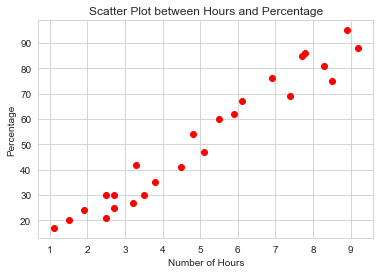

In [8]:
plt.scatter(data['Hours'], data['Scores'], c = "Red")
plt.title("Scatter Plot between Hours and Percentage")
plt.xlabel("Number of Hours")
plt.ylabel("Percentage")
plt.show()

The above scatter plot shows that if a student increases his/her study hours, his/her score might also increase.

### Data Preparation for Model Creation

In [9]:
X = data["Hours"].values.reshape(-1,1)
Y = data["Scores"].values.reshape(-1,1)


In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)
print("Training Set X : ", x_train.shape)
print("Training Set Y : ", y_train.shape)
print("Test Set X : ", x_test.shape)
print("Test Set Y : ", y_test.shape)

Training Set X :  (20, 1)
Training Set Y :  (20, 1)
Test Set X :  (5, 1)
Test Set Y :  (5, 1)


### Model Creation

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
model =  LinearRegression()
model.fit(x_train, y_train)
print("Coefficient: ", model.coef_)
print("Intercept: ", model.intercept_)


Coefficient:  [[9.91065648]]
Intercept:  [2.01816004]


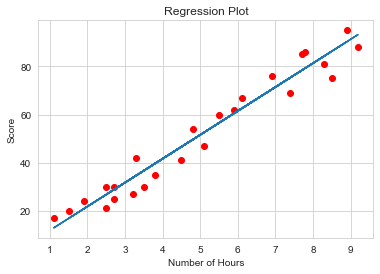

In [13]:
line  = model.coef_*X + model.intercept_
plt.scatter(X, Y, c = 'Red')
plt.plot(X,line)
plt.xlabel("Number of Hours")
plt.ylabel("Score")
plt.title("Regression Plot")
plt.show()


### Prediction using the Created Model 

In [14]:
y_rslt = model.predict(x_test)
y_rslt

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

### Model Evaluation

In [15]:
from sklearn.metrics import r2_score, mean_absolute_error 

In [16]:
print("Mean Absolute Error : ", mean_absolute_error(y_test, y_rslt))
print("R2_score : ", r2_score(y_test, y_rslt))
print ("R2_score % : ", r2_score(y_test, y_rslt)*100 )

Mean Absolute Error :  4.183859899002975
R2_score :  0.9454906892105356
R2_score % :  94.54906892105356


### Final Observations
<ul>
    <li> We observe that the predicted values have very minimal error.
    <li> Overall accuracy of the model is 94%.

</ul>

### <b>Prediction Using Model</b>

#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [17]:
Hour = np.array([9.25]).reshape(-1,1) 
Percentage = model.predict(Hour)
Percentage = np.round(Percentage, decimals = 1)
Percentage

array([[93.7]])

<b>Here, the Linear regression model predicts that if a Student study for 9.25 hours, then he/she will get approximately 93.7% score.</b>`